# CREACIÓN DATASET GDM RISK ENCOUNTER

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px

from datetime import date
from datetime import datetime


In [2]:
observations = pd.read_csv('observations.csv')

In [3]:
patientsFiltered = pd.read_csv('patientsFiltered.csv')

In [7]:
observations

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,8302-2,Body Height,146.5,cm,numeric
1,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,1.0,{score},numeric
2,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,29463-7,Body Weight,41.8,kg,numeric
3,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,39156-5,Body mass index (BMI) [Ratio],19.5,kg/m2,numeric
4,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,59576-9,Body mass index (BMI) [Percentile] Per age and...,67.5,%,numeric
...,...,...,...,...,...,...,...,...,...
280206,2020-11-15T00:29:08Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,NaN,NaN,QOLS,QOLS,1.0,{score},numeric
280207,2021-11-15T00:29:08Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,NaN,NaN,QOLS,QOLS,1.0,{score},numeric
280208,2022-11-15T00:29:08Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,NaN,NaN,QOLS,QOLS,0.8,{score},numeric
280209,2023-11-15T00:29:08Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,NaN,NaN,QOLS,QOLS,1.0,{score},numeric


In [9]:
gdm = pd.DataFrame()

In [11]:
columns = ['PATIENT', 'VALUE']
measures = [
    'Body mass index (BMI) [Ratio]', 
    'Systolic Blood Pressure', 
    'Diastolic Blood Pressure', 
    'Glucose [Mass/volume] in Blood', 
    'Cholesterol in HDL [Mass/volume] in Serum or Plasma', 
    'Hemoglobin [Mass/volume] in Blood'
]
gdm = observations[observations['DESCRIPTION'].isin(measures)][['PATIENT', 'DESCRIPTION', 'VALUE']]

#remombramos colummnas
gdm.rename(columns={
    'DESCRIPTION': 'Measure', 
    'VALUE': 'value'
}, inplace=True)


In [13]:
gdm

,PATIENT,Measure,value
3,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Ratio],19.5
5,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Diastolic Blood Pressure,81.0
6,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Systolic Blood Pressure,104.0
16,d778d02c-1b71-582e-0c64-e9ce715996fc,Body mass index (BMI) [Ratio],22.1
19,d778d02c-1b71-582e-0c64-e9ce715996fc,Diastolic Blood Pressure,74.0
...,...,...,...
280103,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,Hemoglobin [Mass/volume] in Blood,15.0
280140,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,Body mass index (BMI) [Ratio],30.0
280141,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,Diastolic Blood Pressure,90.0
280142,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,Systolic Blood Pressure,126.0


In [15]:
gdm = gdm.pivot_table(
    index = ['PATIENT'], 
    columns='Measure', 
    values='value', 
    aggfunc='first'
).reset_index()

#renombrar columnas para mayor claridad

gdm.rename(columns={
    'Body mass index (BMI) [Ratio]':'BMI', 
    'Systolic Blood Pressure': 'SBP', 
    'Diastolic Blood Pressure': 'DBP', 
    'Glucose [Mass/volume] in Blood':'Glucose', 
    'Cholesterol in HDL [Mass/volume] in Serum or Plasma': 'HDL', 
    'Hemoglobin [Mass/volume] in Blood': 'Hemoglobin'
}, inplace=True)

In [17]:
gdm['PATIENT ID'] = patientsFiltered['Id']
gdm['AGE'] = patientsFiltered['AGE']

In [19]:
gdm

Measure,PATIENT,BMI,HDL,DBP,Glucose,Hemoglobin,SBP,PATIENT ID,AGE
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,58.0,86.0,87.6,16.4,130.0,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20.0
1,006a3718-02e0-4eee-deb2-27735709da2d,23.5,61.5,72.0,67.9,13.0,90.0,d778d02c-1b71-582e-0c64-e9ce715996fc,19.0
2,01370617-7f62-f405-7b16-2cbc16b2e250,24.3,53.4,76.0,99.7,13.6,114.0,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32.0
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,55.8,76.0,93.4,11.8,135.0,6da671b7-6462-2ced-5b86-5b0fced4308b,49.0
4,0213db26-5738-14f0-4dc5-9e5be598241c,22.3,45.4,75.0,NaN,15.2,94.0,4551d27f-d5fc-2b84-1f53-74645d8ba7db,29.0
...,...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,51.6,72.0,NaN,12.9,102.0,NaN,NaN
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,53.8,76.0,NaN,17.0,104.0,NaN,NaN
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,55.4,86.0,87.0,15.6,132.0,NaN,NaN
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,62.6,73.0,NaN,12.5,111.0,NaN,NaN


In [21]:
gdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PATIENT     364 non-null    object 
 1   BMI         364 non-null    object 
 2   HDL         250 non-null    object 
 3   DBP         364 non-null    object 
 4   Glucose     155 non-null    object 
 5   Hemoglobin  364 non-null    object 
 6   SBP         364 non-null    object 
 7   PATIENT ID  206 non-null    object 
 8   AGE         206 non-null    float64
dtypes: float64(1), object(8)
memory usage: 25.7+ KB


Vamos a convertir BMI y Glucose a float64, y el resto menos PATIENT ID a Int64

In [24]:
#conversión edad
gdm['AGE'] = pd.to_numeric(gdm['AGE'], errors = 'coerce')
gdm['AGE'] = gdm['AGE'].round(0).astype('Int64')

#conversión presión diastólica
gdm['DBP'] = pd.to_numeric(gdm['DBP'], errors = 'coerce')
gdm['DBP'] = gdm['DBP'].round(0).astype('Int64')


#conversión presión sistólica
gdm['SBP'] = pd.to_numeric(gdm['SBP'], errors = 'coerce')
gdm['SBP'] = gdm['SBP'].round(0).astype('Int64')

#conversión HDL
gdm['HDL'] = pd.to_numeric(gdm['HDL'], errors = 'coerce')

#conversión hemoglobin
gdm['Hemoglobin'] = pd.to_numeric(gdm['Hemoglobin'], errors = 'coerce')
gdm['Glucose'] = pd.to_numeric(gdm['Glucose'], errors = 'coerce')
gdm['BMI'] = pd.to_numeric(gdm['BMI'], errors = 'coerce')

In [26]:
gdm

Measure,PATIENT,BMI,HDL,DBP,Glucose,Hemoglobin,SBP,PATIENT ID,AGE
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,58.0,86,87.6,16.4,130,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
1,006a3718-02e0-4eee-deb2-27735709da2d,23.5,61.5,72,67.9,13.0,90,d778d02c-1b71-582e-0c64-e9ce715996fc,19
2,01370617-7f62-f405-7b16-2cbc16b2e250,24.3,53.4,76,99.7,13.6,114,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,55.8,76,93.4,11.8,135,6da671b7-6462-2ced-5b86-5b0fced4308b,49
4,0213db26-5738-14f0-4dc5-9e5be598241c,22.3,45.4,75,NaN,15.2,94,4551d27f-d5fc-2b84-1f53-74645d8ba7db,29
...,...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,51.6,72,NaN,12.9,102,NaN,<NA>
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,53.8,76,NaN,17.0,104,NaN,<NA>
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,55.4,86,87.0,15.6,132,NaN,<NA>
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,62.6,73,NaN,12.5,111,NaN,<NA>


## ANÁLISIS ESTADÍSTICO DEL DATASET

In [29]:
gdm.describe()

Measure,BMI,HDL,DBP,Glucose,Hemoglobin,SBP,AGE
count,364.000000,250.000000,364.0,155.000000,364.000000,364.0,206.0
mean,26.135165,52.761600,80.552198,82.701935,14.616484,120.17033,34.320388
std,4.997291,7.842278,9.637508,12.603512,1.843880,14.98056,10.811659
min,13.900000,26.700000,55.0,64.000000,7.600000,77.0,16.0
25%,22.700000,50.425000,74.0,71.550000,13.075000,110.0,25.0
50%,27.400000,53.600000,79.5,83.300000,14.800000,121.0,36.0
75%,29.400000,57.675000,87.0,90.750000,16.400000,131.0,43.0
max,49.900000,70.900000,123.0,150.600000,17.500000,161.0,58.0


In [36]:
gdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PATIENT     364 non-null    object 
 1   BMI         364 non-null    float64
 2   HDL         250 non-null    float64
 3   DBP         364 non-null    Int64  
 4   Glucose     155 non-null    float64
 5   Hemoglobin  364 non-null    float64
 6   SBP         364 non-null    Int64  
 7   PATIENT ID  206 non-null    object 
 8   AGE         206 non-null    Int64  
dtypes: Int64(3), float64(4), object(2)
memory usage: 26.8+ KB


Vamos a verificar el rango en el que se encuentra

In [39]:
def verifica_rango(dataframe):
    """
    Función que comprueba si los valores se encuentran en el rango fisiológico compatible con la vida humana
    devuelve una serie de comentarios diciendo que valores se encuentran dentro del rango y cuáles no. 
    """
    
    rangos_limites = {
        'SBP': (70,200),
        'DBP':(40,120),
        'Glucose':(70.0,220.0),
        'HDL':(50,80),
        'Hemoglobin': (11.6,15),
        'BMI':(18.5, 30)
    }
    
    results= {}
    for col, (min_val, max_val) in rangos_limites.items():
        if col in dataframe.columns:
            
            validos = dataframe[(dataframe[col] >= min_val) & (dataframe[col] <= max_val)]
            fuera_rango = len(dataframe) - len(validos)
            results[col] = {
                'val_fuera_rango':fuera_rango,
                'total_filas': len(dataframe), 
                'valores_validos': len(validos)
            }

    for col, info in results.items():
        print(f"- Valores fuera del rango de {col}:{info['val_fuera_rango']}\n")
        print(f"- Total valores de {col}:{info['total_filas']}\n")
        print(f"- Valores validos de {col}: {info['valores_validos']}\n")
    

In [41]:
gdm.dtypes

Measure
PATIENT        object
BMI           float64
HDL           float64
DBP             Int64
Glucose       float64
Hemoglobin    float64
SBP             Int64
PATIENT ID     object
AGE             Int64
dtype: object

In [43]:
verifica_rango(gdm)

- Valores fuera del rango de SBP:0

- Total valores de SBP:364

- Valores validos de SBP: 364

- Valores fuera del rango de DBP:1

- Total valores de DBP:364

- Valores validos de DBP: 363

- Valores fuera del rango de Glucose:235

- Total valores de Glucose:364

- Valores validos de Glucose: 129

- Valores fuera del rango de HDL:173

- Total valores de HDL:364

- Valores validos de HDL: 191

- Valores fuera del rango de Hemoglobin:177

- Total valores de Hemoglobin:364

- Valores validos de Hemoglobin: 187

- Valores fuera del rango de BMI:90

- Total valores de BMI:364

- Valores validos de BMI: 274



In [45]:
print(gdm.isna().sum())

Measure
PATIENT         0
BMI             0
HDL           114
DBP             0
Glucose       209
Hemoglobin      0
SBP             0
PATIENT ID    158
AGE           158
dtype: int64


Vamos a ajustar los valores a los rangos, y luego insertamos valores por KNN en los valores nulos

In [48]:
def ajustar_valores(df, rangos):
    """
    Función que trunca los valores que se pasan del rango al máximo o mínimo del rango fisiológico. 
    """
    for col, (min_val, max_val) in rangos.items():
        if col in df.columns:
            df[col] = df[col].apply(
                lambda x: max(min(x, max_val), min_val) if not pd.isnull(x) else x
            )
    return df

In [50]:
 rangos_limites = {
        'SBP': (70,200),
        'DBP':(40,120),
        'Glucose':(70.0,220.0),
        'HDL':(50,80),
        'Hemoglobin': (11.6,15),
        'BMI':(18.5, 30)
    }
gdm = ajustar_valores(gdm, rangos_limites)

In [52]:
gdm

Measure,PATIENT,BMI,HDL,DBP,Glucose,Hemoglobin,SBP,PATIENT ID,AGE
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,58.0,86,87.6,15.0,130,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
1,006a3718-02e0-4eee-deb2-27735709da2d,23.5,61.5,72,70.0,13.0,90,d778d02c-1b71-582e-0c64-e9ce715996fc,19
2,01370617-7f62-f405-7b16-2cbc16b2e250,24.3,53.4,76,99.7,13.6,114,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,32
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,55.8,76,93.4,11.8,135,6da671b7-6462-2ced-5b86-5b0fced4308b,49
4,0213db26-5738-14f0-4dc5-9e5be598241c,22.3,50.0,75,NaN,15.0,94,4551d27f-d5fc-2b84-1f53-74645d8ba7db,29
...,...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,51.6,72,NaN,12.9,102,NaN,<NA>
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,53.8,76,NaN,15.0,104,NaN,<NA>
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,55.4,86,87.0,15.0,132,NaN,<NA>
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,62.6,73,NaN,12.5,111,NaN,<NA>


Insertamos los valores ahora que ya hemos truncado los valores existentes

In [55]:
from sklearn.impute import KNNImputer

columns_to_impute = ['Glucose', 'HDL', 'AGE']

imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_data = imputer.fit_transform(gdm[columns_to_impute])

gdm[columns_to_impute] = imputed_data
print(gdm[columns_to_impute].isna().sum())

Measure
Glucose    0
HDL        0
AGE        0
dtype: int64


Las filas con valores nulos en el PATIENT ID serán elimnadas (154)

In [58]:
gdm = gdm.dropna(subset=['PATIENT ID'])

In [60]:
gdm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PATIENT     206 non-null    object 
 1   BMI         206 non-null    float64
 2   HDL         206 non-null    float64
 3   DBP         206 non-null    int64  
 4   Glucose     206 non-null    float64
 5   Hemoglobin  206 non-null    float64
 6   SBP         206 non-null    int64  
 7   PATIENT ID  206 non-null    object 
 8   AGE         206 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 16.1+ KB


Nos ha quedado un dataset bastante pequeño, posiblemente quede sesgado pero lo probaremos.

### CORRELACIONES ENTRE VARIABLES

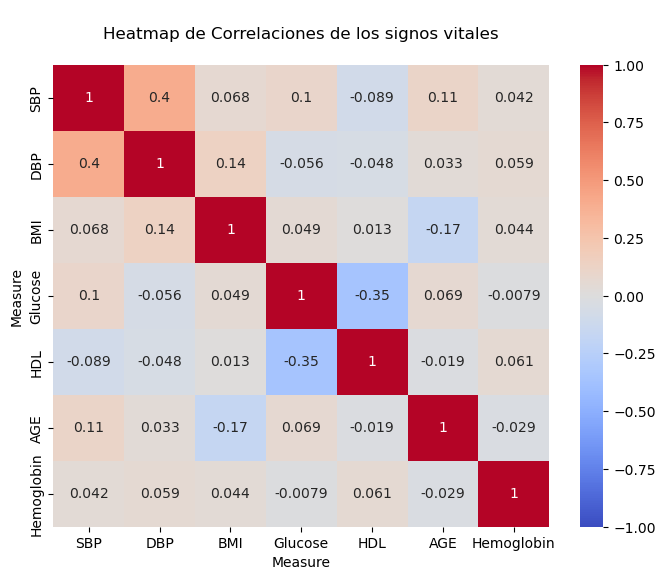

In [64]:
corr_matrix = gdm[['SBP', 'DBP', 'BMI', 'Glucose', 'HDL', 'AGE', 'Hemoglobin']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("\nHeatmap de Correlaciones de los signos vitales\n")
plt.show()

La relación negativa entre Glucose y HDL, es consistente con perfiles metabólicos asociados a la diabetes. 
La relación negativa entre AGE y BMI no es muy consistente ya que a maedida que envejecemos tendemos a retener más líquidos y amovernos menos, teniendo mayor BMI. Puede deberese a que como es una muestra pequeña este sesgada o por ser sintétic atenga un error. 


In [67]:
gdm.to_csv('gdmEncounter.csv', index=False)

In [45]:
gdm = pd.read_csv('gdmEncounter.csv')

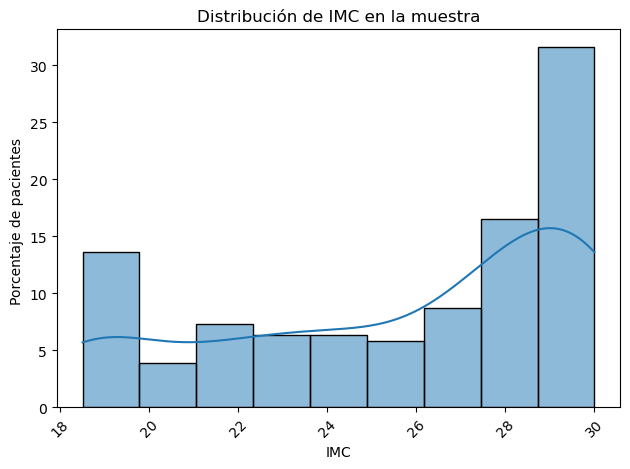

In [47]:
import seaborn as sns
sns.histplot(gdm['BMI'], kde= True, stat = "percent")
plt.title('Distribución de IMC en la muestra')
plt.xlabel('IMC')
plt.ylabel('Porcentaje de pacientes ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CASO LÍMITE (PACIENTES EN TRATAMIENTO DE DIABETES)

In [70]:
careplans = pd.read_csv('careplans.csv')


In [72]:
careplans

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,01612794-cb3e-02ac-1e6f-857a03b9bc69,2018-11-18,2018-12-13,d778d02c-1b71-582e-0c64-e9ce715996fc,f549ca01-9e59-e01c-0b2d-c583240c3ab1,225358003,Wound care (regime/therapy),284549007.0,Laceration of hand (disorder)
1,7ca9b0a8-2941-8c67-0778-0f132ea1a29e,2022-10-06,2023-02-02,d778d02c-1b71-582e-0c64-e9ce715996fc,aa60e9ca-6271-8103-97ad-052099369212,53950000,Respiratory therapy (procedure),NaN,NaN
2,2f17bca4-8478-8a83-b2bd-33a2d53485ce,2024-03-08,2024-04-19,958cbaed-4a32-40ff-f2ee-d55edc4f7611,e839b319-4afe-187b-219c-374d7529e79b,47387005,Head injury rehabilitation (regime/therapy),62564004.0,Concussion with loss of consciousness (disorder)
3,ae9b05d7-b88b-0a25-5f98-bcb2101baea9,2024-09-19,NaN,d778d02c-1b71-582e-0c64-e9ce715996fc,0a723901-5534-ddd3-dfd3-4bee300feb41,134435003,Routine antenatal care (regime/therapy),NaN,NaN
4,c6e88795-3d78-21a4-3ffa-12bbf59e7ae9,2014-03-25,NaN,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,dbe4c0db-e925-25a1-d666-1a4b962aa43b,276239002,Therapy (regime/therapy),NaN,NaN
...,...,...,...,...,...,...,...,...,...
1817,71cfeea4-1e51-d266-9454-6e6f618826ed,1998-12-01,1998-12-24,c98c8053-9db4-940c-60f8-afc6f27d26a1,5f7d8a07-bde8-d215-2980-eca772b0e772,225358003,Wound care (regime/therapy),284551006.0,Laceration of foot (disorder)
1818,cc025873-edc3-94b3-a289-5093d2a7c7fa,2009-04-27,NaN,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,5eb6eebc-78d4-692b-e4ef-876e4168207e,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
1819,239074de-3b58-b0c3-3fdf-aad9233ccd03,2020-11-30,2022-06-27,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,338776fb-ab8c-40e7-8523-b5744a271c82,736252007,Cancer care plan (record artifact),93761005.0,Primary malignant neoplasm of colon (disorder)
1820,bf963bd1-a137-e93c-3fe5-6fa49920e3a5,2020-12-14,NaN,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,03641bc2-f16c-406b-0cad-418e6f9ef284,443402002,Lifestyle education regarding hypertension (pr...,59621000.0,Essential hypertension (disorder)


In [74]:
diabetesPlan = careplans.query("CODE == 735985000")

In [76]:
diabetesPlan

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
29,b5967651-8310-6646-7c37-1958cccc7403,2021-03-11,NaN,4551d27f-d5fc-2b84-1f53-74645d8ba7db,6304b690-6782-4860-8243-e56a13b7c5d6,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
37,770709ba-c844-cc5c-ed96-a16522c0ed6c,2023-08-24,NaN,5a79a85d-ff94-814a-50c3-50e338b30f6a,72acecf6-31d8-e5f7-bf54-ea596c51cd6d,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
54,db19148c-7a46-0e5b-5d54-e725b9c93453,2023-04-23,NaN,bbdac5e5-03f7-1e49-16f8-099031ab7038,dbf5dc09-fc2e-6ccc-99d6-7a490b929c7f,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
87,84ea74c0-c4f4-ecd7-d3cf-6f2e2cfb3b5a,2012-01-19,NaN,b623123e-da86-14aa-bf80-f30a8bf65ac5,06cf26d1-6e83-236f-daa6-52250c140e06,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
104,f8333019-984f-1667-975d-cf05aaae219c,2014-04-12,NaN,462e16fe-de54-f265-b5fb-7e726b53eee8,915c6704-d02b-5a04-9ae4-dc411fc7e61a,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
...,...,...,...,...,...,...,...,...,...
1782,3be25ad1-300f-4e98-cd0e-2d96054b06b6,2008-03-13,NaN,71163ca7-8a46-ca76-782a-1ddab03665fd,ec369999-7ae0-53a9-ebe9-53a436380409,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
1797,81235e18-1063-db32-1c95-7331453d3b16,1997-03-20,NaN,c625eb48-59e4-2734-8b61-9d9c727ffea6,7c1c4a78-ca5f-c59e-888b-2a9a821c0281,735985000,Diabetes self management plan (record artifact),44054006.0,Diabetes mellitus type 2 (disorder)
1805,f3221554-5b87-ffd0-6369-4f4f5fce1996,1997-01-31,NaN,3eae3f10-5a0a-06ed-0394-ce31eee9dcad,5a588dc8-d6d4-ec95-627f-5a0e89e6f9fb,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
1806,5dd6a45f-163c-38c1-51d2-d0e6a9ecaee3,1993-07-29,NaN,4c5b8cb6-f5e5-8610-5200-2d85076188b7,3f150dc4-a93d-84dc-5be1-e57bc8fba50c,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)


Vemos que hay fecha de inicio pero no de fin del tratamiento

In [79]:
diabetesPlan['START'] = pd.to_datetime(diabetesPlan['START'])

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_7084\1260922356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetesPlan['START'] = pd.to_datetime(diabetesPlan['START'])


In [81]:
diabetesPlan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 29 to 1818
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 129 non-null    object        
 1   START              129 non-null    datetime64[ns]
 2   STOP               0 non-null      object        
 3   PATIENT            129 non-null    object        
 4   ENCOUNTER          129 non-null    object        
 5   CODE               129 non-null    int64         
 6   DESCRIPTION        129 non-null    object        
 7   REASONCODE         129 non-null    float64       
 8   REASONDESCRIPTION  129 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 10.1+ KB


**Usamos misma fecha de observación: 01/01/2024**

In [84]:
filtered_df = diabetesPlan[diabetesPlan['START'] >= '2024-01-01']


In [86]:
filtered_df

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
1275,044d41f4-9a6f-2323-d9a5-4701e03a8572,2024-02-15,NaN,622ee8d5-def3-ba5c-bd42-f82fbaa6db09,78f32cbf-5a97-72e2-f994-5e65418153e0,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)


Solo hay una persona, así que vamos a cambiar el año para que sea en 2024. 

In [89]:
diabetesPlan['START'] = pd.to_datetime(diabetesPlan['START'], errors='coerce')
diabetesPlan['START'] = diabetesPlan['START'].apply(lambda x: pd.Timestamp(year=2024, month=x.month, day=x.day) if pd.notna(x) else x)

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_7084\1844189704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetesPlan['START'] = pd.to_datetime(diabetesPlan['START'], errors='coerce')
C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_7084\1844189704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetesPlan['START'] = diabetesPlan['START'].apply(lambda x: pd.Timestamp(year=2024, month=x.month, day=x.day) if pd.notna(x) else x)


In [91]:
diabetesPlan

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
29,b5967651-8310-6646-7c37-1958cccc7403,2024-03-11,NaN,4551d27f-d5fc-2b84-1f53-74645d8ba7db,6304b690-6782-4860-8243-e56a13b7c5d6,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
37,770709ba-c844-cc5c-ed96-a16522c0ed6c,2024-08-24,NaN,5a79a85d-ff94-814a-50c3-50e338b30f6a,72acecf6-31d8-e5f7-bf54-ea596c51cd6d,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
54,db19148c-7a46-0e5b-5d54-e725b9c93453,2024-04-23,NaN,bbdac5e5-03f7-1e49-16f8-099031ab7038,dbf5dc09-fc2e-6ccc-99d6-7a490b929c7f,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
87,84ea74c0-c4f4-ecd7-d3cf-6f2e2cfb3b5a,2024-01-19,NaN,b623123e-da86-14aa-bf80-f30a8bf65ac5,06cf26d1-6e83-236f-daa6-52250c140e06,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
104,f8333019-984f-1667-975d-cf05aaae219c,2024-04-12,NaN,462e16fe-de54-f265-b5fb-7e726b53eee8,915c6704-d02b-5a04-9ae4-dc411fc7e61a,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
...,...,...,...,...,...,...,...,...,...
1782,3be25ad1-300f-4e98-cd0e-2d96054b06b6,2024-03-13,NaN,71163ca7-8a46-ca76-782a-1ddab03665fd,ec369999-7ae0-53a9-ebe9-53a436380409,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
1797,81235e18-1063-db32-1c95-7331453d3b16,2024-03-20,NaN,c625eb48-59e4-2734-8b61-9d9c727ffea6,7c1c4a78-ca5f-c59e-888b-2a9a821c0281,735985000,Diabetes self management plan (record artifact),44054006.0,Diabetes mellitus type 2 (disorder)
1805,f3221554-5b87-ffd0-6369-4f4f5fce1996,2024-01-31,NaN,3eae3f10-5a0a-06ed-0394-ce31eee9dcad,5a588dc8-d6d4-ec95-627f-5a0e89e6f9fb,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
1806,5dd6a45f-163c-38c1-51d2-d0e6a9ecaee3,2024-07-29,NaN,4c5b8cb6-f5e5-8610-5200-2d85076188b7,3f150dc4-a93d-84dc-5be1-e57bc8fba50c,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)


In [93]:
startNullCount = diabetesPlan['START'].isnull().sum()
print(f"Valores nulos en la columna START: {startNullCount} de {diabetesPlan['START'].shape[0]}")

Valores nulos en la columna START: 0 de 129


# Filtro de pacientes con mayor número de visitas

Como es un seguimiento a lo largo de los 9 meses de embarazo, queremos seguir viendo a cuántas consultas acuden pese a que en la columna 'STOP' no aparezca el fin del tratamiento

In [97]:
encounters = pd.read_csv('encounters.csv')

In [99]:
# filtramos a las pacientes selecccionadas. 
encounters['diabetes_plan'] = encounters['PATIENT'].isin(diabetesPlan['PATIENT'])

In [101]:
encounters.query("diabetes_plan == True")

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,diabetes_plan
217,f73913f2-9289-7c77-1b31-0d55f157b008,1999-10-03T02:34:56Z,1999-10-03T02:49:56Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,f43f97f2-af04-3ed0-a42e-3681718cc9b2,21d733b6-4fd9-35be-8361-3f490931c8c9,e03e23c9-4df1-3eb6-a62d-f70f02301496,ambulatory,185345009,Encounter for symptom (procedure),85.55,92.93,0.00,36971009.0,Sinusitis (disorder),True
218,01f82d78-db39-487d-0db0-3d2d22bd5e69,2012-01-26T06:34:56Z,2012-01-26T07:01:38Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,486bf543-9696-3d51-aa70-28a3044ce490,49ae2ea8-16d8-37f2-95e3-41c037debbba,d31fccc3-1767-390d-966a-22a5156f4219,wellness,410620009,Well child visit (procedure),136.80,919.90,0.00,NaN,NaN,True
219,b28dba34-3af8-2100-db0c-91195a3fb9a8,2013-01-31T06:34:56Z,2013-01-31T07:10:53Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,486bf543-9696-3d51-aa70-28a3044ce490,49ae2ea8-16d8-37f2-95e3-41c037debbba,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,1023.74,0.00,NaN,NaN,True
220,081cf9e8-a2ce-0a92-e2e2-759d648ebc1c,2014-02-06T06:34:56Z,2014-02-06T07:06:39Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,486bf543-9696-3d51-aa70-28a3044ce490,49ae2ea8-16d8-37f2-95e3-41c037debbba,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,704.20,0.00,NaN,NaN,True
221,e072ced9-7d66-37b3-6bd0-9ab1702ac6fd,2014-02-13T06:34:56Z,2014-02-13T06:49:56Z,4551d27f-d5fc-2b84-1f53-74645d8ba7db,f43f97f2-af04-3ed0-a42e-3681718cc9b2,21d733b6-4fd9-35be-8361-3f490931c8c9,d31fccc3-1767-390d-966a-22a5156f4219,outpatient,185347001,Encounter for problem (procedure),85.55,85.55,0.00,82423001.0,Chronic pain (finding),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32745,4c2c13fc-389c-5305-dfe8-84cb7ff2f300,2022-12-26T00:29:08Z,2022-12-26T01:02:33Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),136.80,853.36,753.36,NaN,NaN,True
32746,9827a5ac-0451-516d-031b-eab536d839d2,2023-09-25T05:29:08Z,2023-09-25T05:44:08Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),85.55,85.55,35.55,75498004.0,Acute bacterial sinusitis (disorder),True
32747,19ab31ad-8140-02fb-d3d9-04ef7225ef99,2023-10-28T05:29:08Z,2023-10-28T05:44:08Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),85.55,92.93,42.93,75498004.0,Acute bacterial sinusitis (disorder),True
32748,b8bdd2bf-b6e0-85d8-2f13-fac2c1bbcdcf,2024-01-01T00:29:08Z,2024-01-01T01:14:49Z,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),136.80,1632.30,1532.30,NaN,NaN,True


Como hemos cambiado la fecha en careplans, debido a que sólo había un paciente registrada en 2024, haremos lo mismo para este dataset. 

In [104]:
encounters['START'] = pd.to_datetime(encounters['START'], errors='coerce')
encounters['STOP'] = pd.to_datetime(encounters['STOP'], errors='coerce')

encounters['START'] = encounters['START'].apply(lambda x: pd.Timestamp(year=2024, month=x.month, day=x.day) if pd.notna(x) else x)
encounters['STOP'] = encounters['STOP'].apply(lambda x: pd.Timestamp(year=2024, month=x.month, day=x.day) if pd.notna(x) else x)

In [105]:
encounters

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,diabetes_plan
0,9c7664c0-33a3-6778-7845-7b08030a230c,2024-10-27,2024-10-28,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),136.80,1186.78,0.00,NaN,NaN,False
1,75f6d06e-01e4-999f-656e-a4def079a8f6,2024-11-02,2024-11-03,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),136.80,840.20,0.00,NaN,NaN,False
2,3682fee4-9f43-f8ae-bc5c-8a0b8b42528f,2024-12-18,2024-12-18,d778d02c-1b71-582e-0c64-e9ce715996fc,5fa5e611-be3d-3ebb-8f71-124325f6005f,236e8b0e-dba1-31a5-a5ac-f8b4dff4ecc6,0133f751-9229-3cfd-815f-b6d4979bdd6a,wellness,410620009,Well child visit (procedure),136.80,272.80,0.00,NaN,NaN,False
3,c77234be-e24b-5ebf-0e7a-0c835da53642,2024-05-01,2024-05-01,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,0133f751-9229-3cfd-815f-b6d4979bdd6a,ambulatory,185345009,Encounter for symptom (procedure),85.55,85.55,0.00,195662009.0,Acute viral pharyngitis (disorder),False
4,b22ac215-c066-f45c-8201-673d1d33f67b,2024-11-07,2024-11-08,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),136.80,1305.43,0.00,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32745,4c2c13fc-389c-5305-dfe8-84cb7ff2f300,2024-12-26,2024-12-26,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),136.80,853.36,753.36,NaN,NaN,True
32746,9827a5ac-0451-516d-031b-eab536d839d2,2024-09-25,2024-09-25,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),85.55,85.55,35.55,75498004.0,Acute bacterial sinusitis (disorder),True
32747,19ab31ad-8140-02fb-d3d9-04ef7225ef99,2024-10-28,2024-10-28,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),85.55,92.93,42.93,75498004.0,Acute bacterial sinusitis (disorder),True
32748,b8bdd2bf-b6e0-85d8-2f13-fac2c1bbcdcf,2024-01-01,2024-01-01,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),136.80,1632.30,1532.30,NaN,NaN,True


Nos hemos quedado con las pacientes que están en un tratamiento de diabetes. Pero sólo nos interesan las visitas relacionadas con el manejo de la deiabetes y del cuidado perinatal. Filtramos para sólo quedarnos con este tipo de visitas (buscamos que acudan a visitas sobre el embarazo). 

In [109]:
encounters.query("REASONCODE == 72892002")

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,diabetes_plan
41,0a723901-5534-ddd3-dfd3-4bee300feb41,2024-09-19,2024-09-19,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,424441002,Prenatal initial visit (regime/therapy),142.58,55053.32,38144.95,72892002.0,Normal pregnancy (finding),False
51,72f112e5-5128-a9fb-7eb1-c4965f071a19,2024-12-02,2024-12-03,958cbaed-4a32-40ff-f2ee-d55edc4f7611,06cc2462-430f-3322-9c87-7e971125f510,e90cb995-6e59-31e7-9e03-512081d49303,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424441002,Prenatal initial visit (regime/therapy),142.58,8974.10,1728.06,72892002.0,Normal pregnancy (finding),False
52,31273ce2-5399-dd91-60e2-b194ff5fb6e4,2024-12-09,2024-12-10,958cbaed-4a32-40ff-f2ee-d55edc4f7611,06cc2462-430f-3322-9c87-7e971125f510,e90cb995-6e59-31e7-9e03-512081d49303,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,270427003,Patient-initiated encounter (procedure),85.55,4444.98,2666.99,72892002.0,Normal pregnancy (finding),False
53,eec0010f-e79c-f8ce-0f40-4bfda83aa93c,2024-10-17,2024-10-17,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,10091.82,10091.82,72892002.0,Normal pregnancy (finding),False
54,e7ed1b59-5a3a-21db-2c6a-694304854ba4,2024-11-14,2024-11-14,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,8548.56,8548.56,72892002.0,Normal pregnancy (finding),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32710,fa6b18e1-c89b-a69e-ef37-1b192b1e95af,2024-11-05,2024-11-05,c98c8053-9db4-940c-60f8-afc6f27d26a1,b9e35b8a-9831-32d8-a6dc-d7a546c126b0,6d1a3076-63f8-3c60-b49e-33886efca42a,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,12745.22,3990.73,72892002.0,Normal pregnancy (finding),False
32712,a0ce1c58-8886-73d4-c291-db93b58e1253,2024-12-03,2024-12-03,c98c8053-9db4-940c-60f8-afc6f27d26a1,b9e35b8a-9831-32d8-a6dc-d7a546c126b0,6d1a3076-63f8-3c60-b49e-33886efca42a,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,4665.96,4665.96,72892002.0,Normal pregnancy (finding),False
32713,8459c0f7-1d7d-591b-e62d-4254283cbf38,2024-12-31,2024-12-31,c98c8053-9db4-940c-60f8-afc6f27d26a1,b9e35b8a-9831-32d8-a6dc-d7a546c126b0,6d1a3076-63f8-3c60-b49e-33886efca42a,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,6200.68,6200.68,72892002.0,Normal pregnancy (finding),False
32714,34f46fad-74b9-9d97-6c7c-26e7727acf3d,2024-01-28,2024-01-28,c98c8053-9db4-940c-60f8-afc6f27d26a1,b9e35b8a-9831-32d8-a6dc-d7a546c126b0,6d1a3076-63f8-3c60-b49e-33886efca42a,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,ambulatory,424619006,Prenatal visit (regime/therapy),142.58,18478.80,18478.80,72892002.0,Normal pregnancy (finding),False


Ahora que ya tenemos mujeres embarazadas que están bajo tratamiento de diabetes, nos quedamos con las que más información tengamos ( a más conultas acudan)

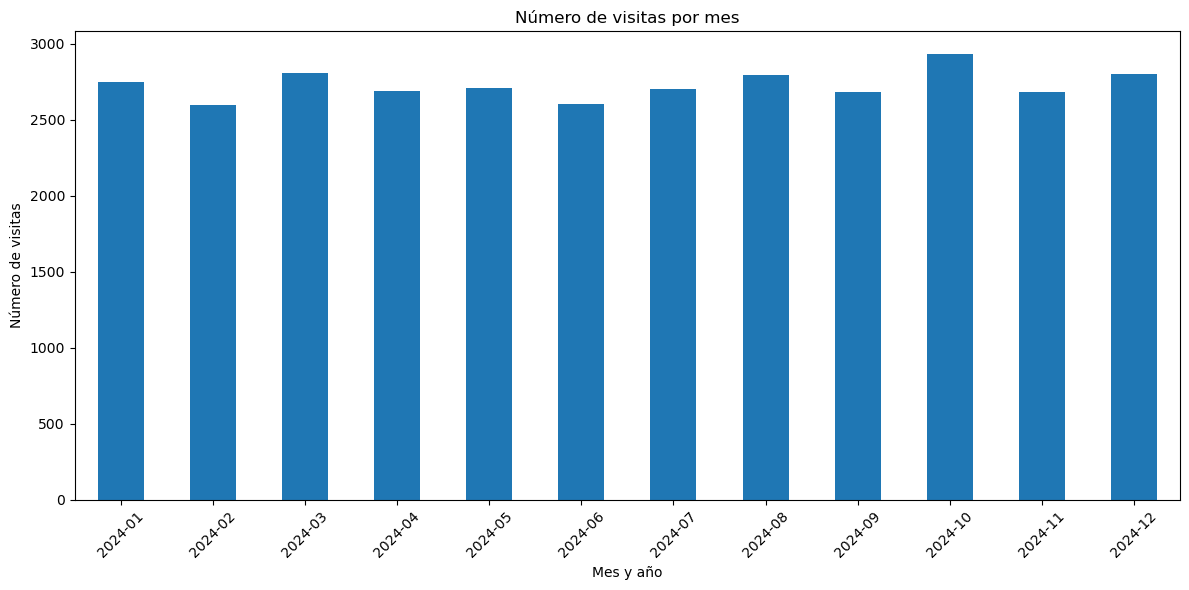

In [112]:
#creamos una columna auxiliar por mes y año:
encounters['Month_Year'] = encounters['START'].dt.to_period('M')

#número de visitas por mes:
monthly_visitsDiabetes = encounters['Month_Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
monthly_visitsDiabetes.plot(kind='bar')
plt.title('Número de visitas por mes')
plt.xlabel('Mes y año')
plt.ylabel('Número de visitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_7084\1041391512.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


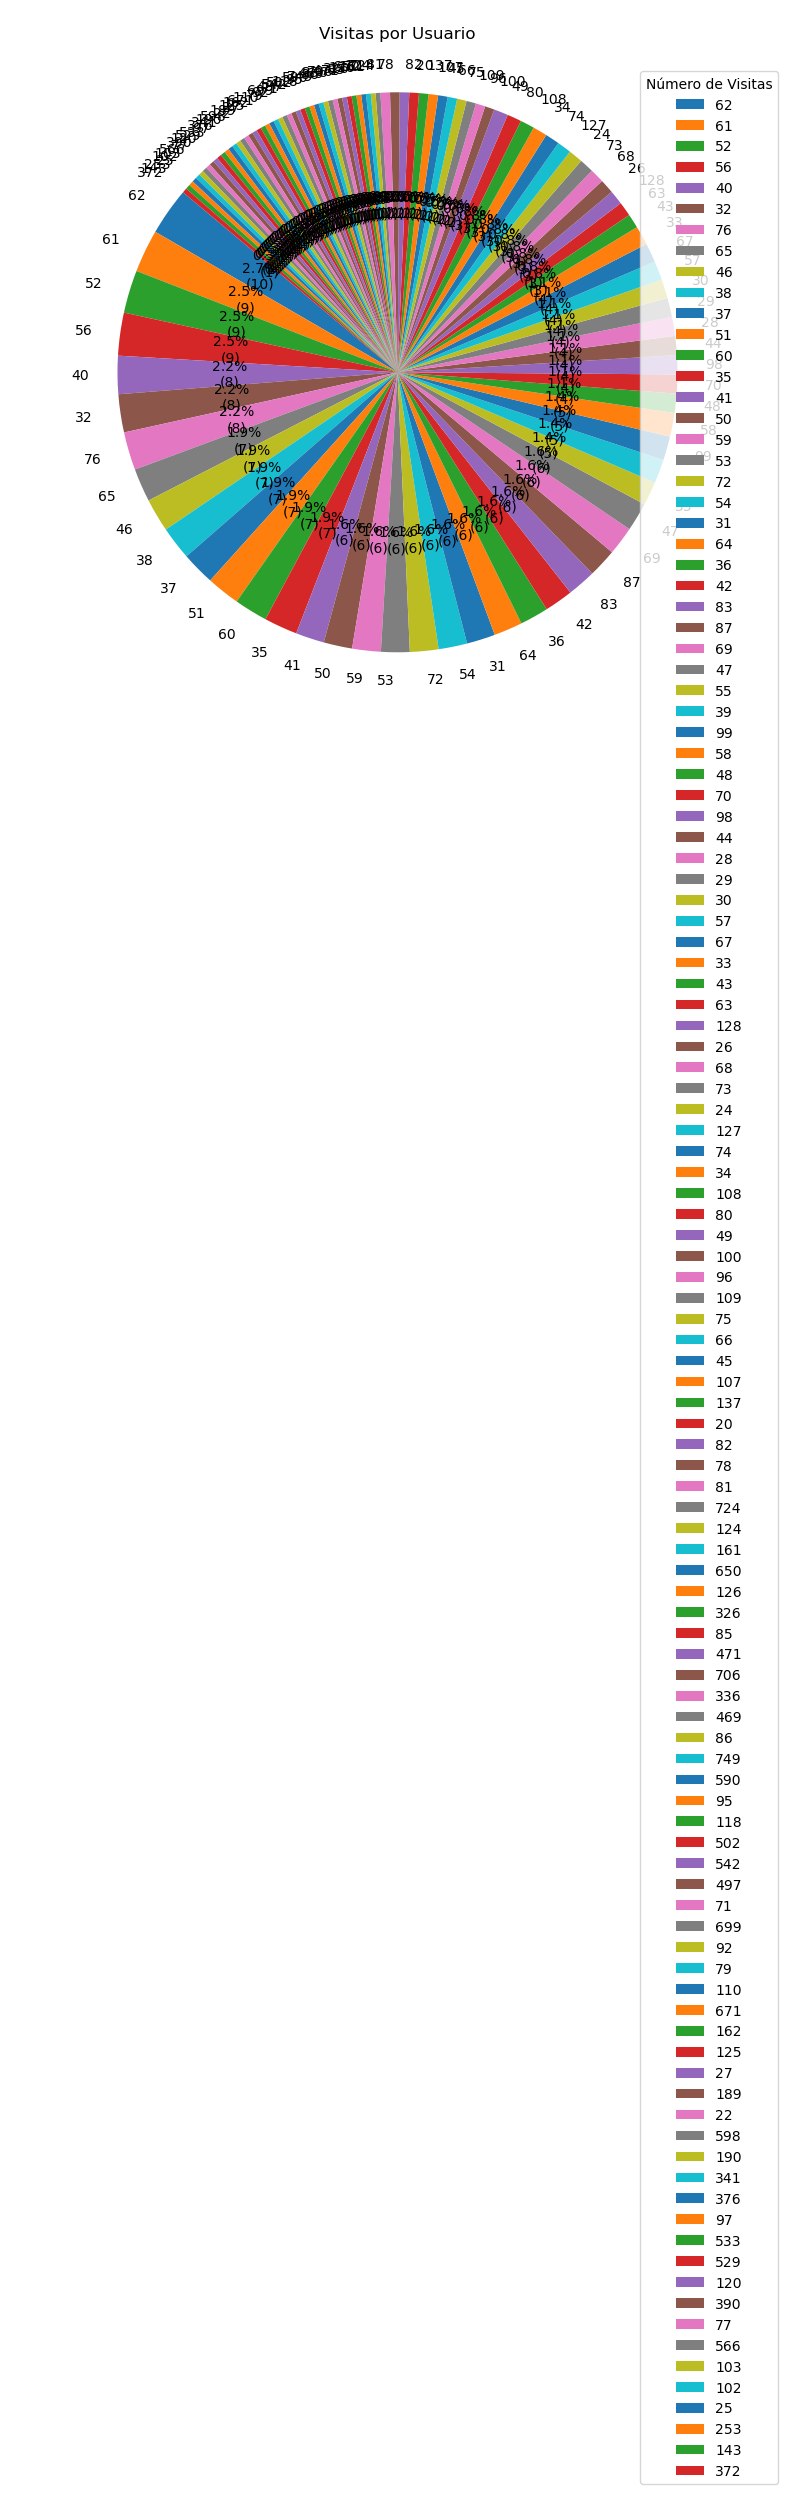

In [119]:
max_visits_userDiabetes = encounters.groupby('PATIENT')['Id'].count()

#cantidad de usuarios por cada máximo de visitas
user_countsDiabetes= max_visits_userDiabetes.value_counts()
user_percentagesDiabetes = (user_countsDiabetes/user_countsDiabetes.sum())*100

plt.figure(figsize=(10,8))
plt.pie(user_countsDiabetes, labels=user_countsDiabetes.index, autopct=lambda p: f'{p:.1f}%\n({p*user_countsDiabetes.sum()/100:.0f})', startangle=140)
plt.title('\nVisitas por Usuario\n')
plt.axis('equal')
plt.legend(title='Número de Visitas', loc='upper right')
plt.tight_layout()
plt.show()

Como se puede observar, tenemos muchas visitas, cosa que cabría esperar porque en los protocolos de la vida real, se hacen visitas al doctor de forma más frecuente. 

In [126]:
encounters.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'diabetes_plan', 'Month_Year'],
      dtype='object')

In [162]:
encounters.to_csv('pregnantDiabeticWomenEncounter.csv', index=False)

## FILTRO DE DATASET PACIENTES PARA OBTENER LA EDAD

In [167]:
patients = pd.read_csv('patients.csv')

In [169]:
#Edad de las pacientes
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])
ref_date = datetime(2024,1,1)
patients['AGE'] = (ref_date - patients['BIRTHDATE']).dt.days // 365

In [171]:
patients

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE
0,958cbaed-4a32-40ff-f2ee-d55edc4f7611,2003-10-13,NaN,999-46-5780,S99985773,X43751887X,Ms.,Sol312,Ciara810,Baumbach677,...,Massachusetts,Middlesex County,NaN,0,42.678887,-71.466652,83748.67,8386.12,847165,20
1,d778d02c-1b71-582e-0c64-e9ce715996fc,2004-12-09,NaN,999-44-8153,S99922963,X17785689X,Ms.,Irma773,Terresa418,Shields502,...,Massachusetts,Barnstable County,25001.0,2648,41.712246,-70.451110,80934.70,70863.00,62412,19
2,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,1991-09-05,NaN,999-31-9506,S99963368,X48163920X,Mrs.,Rocio28,Ángela136,Bermúdez789,...,Massachusetts,Hampden County,25013.0,1020,42.175006,-72.570417,10853.87,707739.51,1348,32
3,8cc46582-8727-0024-6010-c5e7e2943578,2000-07-25,NaN,999-55-8680,S99950926,X19763814X,Ms.,Lelah386,Crystal2,Leannon79,...,Massachusetts,Worcester County,25027.0,1605,42.192066,-71.751869,122151.80,144375.81,95771,23
4,6da671b7-6462-2ced-5b86-5b0fced4308b,1974-02-04,NaN,999-31-4155,S99970004,X2187110X,Mrs.,Olympia319,Pamula578,Huels583,...,Massachusetts,Suffolk County,25025.0,2151,42.461726,-71.000002,186763.75,853299.76,26068,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,3eae3f10-5a0a-06ed-0394-ce31eee9dcad,1968-11-22,1998-04-10,999-29-1885,S99917657,X24168209X,Ms.,Glenna97,Sherry479,Friesen796,...,Massachusetts,Barnstable County,25001.0,2630,41.724517,-70.300414,11151.16,1108113.17,22800,55
360,4c5b8cb6-f5e5-8610-5200-2d85076188b7,1971-05-27,2016-07-31,999-91-8201,S99932905,X74962575X,Mrs.,Freeda113,Charlyn749,Larson43,...,Massachusetts,Barnstable County,25001.0,2601,41.621519,-70.306881,579292.23,314816.37,52934,52
361,e00f0d3b-e390-b39c-d2e5-8c2db6b7feba,1967-12-26,1993-08-29,999-33-1496,S99997260,X87678265X,Ms.,Senaida415,Ying817,Kiehn525,...,Massachusetts,Suffolk County,25025.0,2129,42.384591,-71.117556,7950.16,519376.83,7445,56
362,c98c8053-9db4-940c-60f8-afc6f27d26a1,1966-10-20,1999-02-04,999-40-1502,S99988166,X44490311X,Ms.,Ivory697,Alise864,Stracke611,...,Massachusetts,Hampden County,25013.0,1106,42.074314,-72.578348,156624.98,266749.55,336199,57


In [175]:
diabeticPatients = patients[patients["Id"].isin(encounters["PATIENT"])]
encounters  = encounters.merge(diabeticPatients[['Id', 'AGE']], 
                              left_on='PATIENT', right_on='Id', how='left')

In [177]:
encounters

,Id_x,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,...,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,diabetes_plan,Month_Year,Id_y,AGE_x,Id,AGE_y
0,9c7664c0-33a3-6778-7845-7b08030a230c,2024-10-27,2024-10-28,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),...,1186.78,0.00,NaN,NaN,False,2024-10,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
1,75f6d06e-01e4-999f-656e-a4def079a8f6,2024-11-02,2024-11-03,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),...,840.20,0.00,NaN,NaN,False,2024-11,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
2,3682fee4-9f43-f8ae-bc5c-8a0b8b42528f,2024-12-18,2024-12-18,d778d02c-1b71-582e-0c64-e9ce715996fc,5fa5e611-be3d-3ebb-8f71-124325f6005f,236e8b0e-dba1-31a5-a5ac-f8b4dff4ecc6,0133f751-9229-3cfd-815f-b6d4979bdd6a,wellness,410620009,Well child visit (procedure),...,272.80,0.00,NaN,NaN,False,2024-12,d778d02c-1b71-582e-0c64-e9ce715996fc,19,d778d02c-1b71-582e-0c64-e9ce715996fc,19
3,c77234be-e24b-5ebf-0e7a-0c835da53642,2024-05-01,2024-05-01,d778d02c-1b71-582e-0c64-e9ce715996fc,9d989fcf-4ad9-3972-ada3-f275d967781e,dc678fc2-279d-3be8-be3f-b28dc4e317fb,0133f751-9229-3cfd-815f-b6d4979bdd6a,ambulatory,185345009,Encounter for symptom (procedure),...,85.55,0.00,195662009.0,Acute viral pharyngitis (disorder),False,2024-05,d778d02c-1b71-582e-0c64-e9ce715996fc,19,d778d02c-1b71-582e-0c64-e9ce715996fc,19
4,b22ac215-c066-f45c-8201-673d1d33f67b,2024-11-07,2024-11-08,958cbaed-4a32-40ff-f2ee-d55edc4f7611,d6c165ec-d9ca-35a5-9bc8-2061cbfb83a2,b9c0c3c3-14b8-3b3d-8934-5b89b2b6475b,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,wellness,410620009,Well child visit (procedure),...,1305.43,0.00,NaN,NaN,False,2024-11,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32745,4c2c13fc-389c-5305-dfe8-84cb7ff2f300,2024-12-26,2024-12-26,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),...,853.36,753.36,NaN,NaN,True,2024-12,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58
32746,9827a5ac-0451-516d-031b-eab536d839d2,2024-09-25,2024-09-25,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),...,85.55,35.55,75498004.0,Acute bacterial sinusitis (disorder),True,2024-09,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58
32747,19ab31ad-8140-02fb-d3d9-04ef7225ef99,2024-10-28,2024-10-28,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,c7542447-e06e-32cb-b6db-243c23a0dbc2,a8287324-f8d6-31e1-beae-004b795fa507,df166300-5a78-3502-a46a-832842197811,ambulatory,185345009,Encounter for symptom (procedure),...,92.93,42.93,75498004.0,Acute bacterial sinusitis (disorder),True,2024-10,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58
32748,b8bdd2bf-b6e0-85d8-2f13-fac2c1bbcdcf,2024-01-01,2024-01-01,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,e5b9db6a-8dd8-3622-b9ce-3dc593e111d1,bee22fdb-0ccc-32aa-80d3-f9e677dc8d4f,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),...,1632.30,1532.30,NaN,NaN,True,2024-01,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58,5c25efe7-fc0a-3afa-5577-72c3f5cfc7f0,58


In [179]:
encounters.drop(columns=['Id', 'Id_y', 'AGE_y'], inplace=True)

In [183]:
encounters.drop(columns=['Id_x'], inplace=True)

In [185]:
encounters.columns

Index(['START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'diabetes_plan', 'Month_Year', 'AGE_x'],
      dtype='object')

In [187]:
encounters.rename(columns={'AGE_x':'Age'}, inplace=True)

# MODIFICACIÓN DEL DATASET PARA METERLO EN ALGORITMO GDM RISK

In [139]:
observations = pd.read_csv('observations.csv')

In [141]:
diabeticWomen = pd.DataFrame()

In [143]:
columns = ['PATIENT', 'VALUE']
measures = [
    'Body mass index (BMI) [Ratio]', 
    'Systolic Blood Pressure', 
    'Diastolic Blood Pressure', 
    'Glucose [Mass/volume] in Blood', 
    'Cholesterol in HDL [Mass/volume] in Serum or Plasma', 
    'Hemoglobin [Mass/volume] in Blood'
]
diabeticWomen = observations[observations['DESCRIPTION'].isin(measures)][['PATIENT', 'DESCRIPTION', 'VALUE']]

#remombramos colummnas
diabeticWomen.rename(columns={
    'DESCRIPTION': 'Measure', 
    'VALUE': 'value'
}, inplace=True)


In [145]:
diabeticWomen.head()

,PATIENT,Measure,value
3,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Ratio],19.5
5,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Diastolic Blood Pressure,81.0
6,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Systolic Blood Pressure,104.0
16,d778d02c-1b71-582e-0c64-e9ce715996fc,Body mass index (BMI) [Ratio],22.1
19,d778d02c-1b71-582e-0c64-e9ce715996fc,Diastolic Blood Pressure,74.0


In [147]:
diabeticWomen = diabeticWomen.pivot_table(
    index = ['PATIENT'], 
    columns='Measure', 
    values='value', 
    aggfunc='first'
).reset_index()

#renombrar columnas para mayor claridad

diabeticWomen.rename(columns={
    'Body mass index (BMI) [Ratio]':'BMI', 
    'Systolic Blood Pressure': 'SBP', 
    'Diastolic Blood Pressure': 'DBP', 
    'Glucose [Mass/volume] in Blood':'Glucose', 
    'Cholesterol in HDL [Mass/volume] in Serum or Plasma': 'HDL', 
    'Hemoglobin [Mass/volume] in Blood': 'Hemoglobin'
}, inplace=True)

In [189]:
diabeticWomen['PATIENT ID'] = encounters['PATIENT']
diabeticWomen['Age'] =encounters['Age']

In [191]:
diabeticWomen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PATIENT     364 non-null    object
 1   BMI         364 non-null    object
 2   HDL         250 non-null    object
 3   DBP         364 non-null    object
 4   Glucose     155 non-null    object
 5   Hemoglobin  364 non-null    object
 6   SBP         364 non-null    object
 7   PATIENT ID  364 non-null    object
 8   Age         364 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 25.7+ KB


In [195]:
#conversión edad
diabeticWomen['Age'] = pd.to_numeric(diabeticWomen['Age'], errors = 'coerce')
diabeticWomen['Age'] = diabeticWomen['Age'].round(0).astype('Int64')

#conversión presión diastólica
diabeticWomen['DBP'] = pd.to_numeric(diabeticWomen['DBP'], errors = 'coerce')
diabeticWomen['DBP'] = gdm['DBP'].round(0).astype('Int64')


#conversión presión sistólica
diabeticWomen['SBP'] = pd.to_numeric(diabeticWomen['SBP'], errors = 'coerce')
diabeticWomen['SBP'] = diabeticWomen['SBP'].round(0).astype('Int64')

#conversión HDL
diabeticWomen['HDL'] = pd.to_numeric(diabeticWomen['HDL'], errors = 'coerce')

#conversión hemoglobin
diabeticWomen['Hemoglobin'] = pd.to_numeric(diabeticWomen['Hemoglobin'], errors = 'coerce')
diabeticWomen['Glucose'] = pd.to_numeric(diabeticWomen['Glucose'], errors = 'coerce')
diabeticWomen['BMI'] = pd.to_numeric(diabeticWomen['BMI'], errors = 'coerce')

In [197]:
diabeticWomen

Measure,PATIENT,BMI,HDL,DBP,Glucose,Hemoglobin,SBP,PATIENT ID,Age
0,0037c68d-bbf3-0ce6-7fec-fa670bf7b996,28.1,58.0,86,87.6,16.4,130,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
1,006a3718-02e0-4eee-deb2-27735709da2d,23.5,61.5,72,67.9,13.0,90,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
2,01370617-7f62-f405-7b16-2cbc16b2e250,24.3,53.4,76,99.7,13.6,114,d778d02c-1b71-582e-0c64-e9ce715996fc,19
3,0208384d-4316-4c11-0ffe-f0e13bca4417,28.2,55.8,76,93.4,11.8,135,d778d02c-1b71-582e-0c64-e9ce715996fc,19
4,0213db26-5738-14f0-4dc5-9e5be598241c,22.3,45.4,75,NaN,15.2,94,958cbaed-4a32-40ff-f2ee-d55edc4f7611,20
...,...,...,...,...,...,...,...,...,...
359,fdcc36b7-0bfd-276d-52dd-4059230ff7ca,25.4,51.6,<NA>,NaN,12.9,102,4551d27f-d5fc-2b84-1f53-74645d8ba7db,29
360,fe026ae0-a34c-5399-b6d1-129d573de9f7,27.3,53.8,<NA>,NaN,17.0,104,4551d27f-d5fc-2b84-1f53-74645d8ba7db,29
361,fe431a7e-d7fc-03da-38c9-305889835377,29.9,55.4,<NA>,87.0,15.6,132,4551d27f-d5fc-2b84-1f53-74645d8ba7db,29
362,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,25.3,62.6,<NA>,NaN,12.5,111,4551d27f-d5fc-2b84-1f53-74645d8ba7db,29


## ANÁLISIS ESTADÍSTICO DEL DATASET

In [200]:
diabeticWomen.describe()

Measure,BMI,HDL,DBP,Glucose,Hemoglobin,SBP,Age
count,364.000000,250.000000,206.0,155.000000,364.000000,364.0,364.0
mean,26.135165,52.761600,80.932039,82.701935,14.616484,120.17033,31.373626
std,4.997291,7.842278,8.788309,12.603512,1.843880,14.98056,8.483526
min,13.900000,26.700000,55.0,64.000000,7.600000,77.0,19.0
25%,22.700000,50.425000,75.0,71.550000,13.075000,110.0,29.0
50%,27.400000,53.600000,80.5,83.300000,14.800000,121.0,32.0
75%,29.400000,57.675000,87.0,90.750000,16.400000,131.0,33.5
max,49.900000,70.900000,120.0,150.600000,17.500000,161.0,49.0


In [203]:
diabeticWomen.dtypes

Measure
PATIENT        object
BMI           float64
HDL           float64
DBP             Int64
Glucose       float64
Hemoglobin    float64
SBP             Int64
PATIENT ID     object
Age             Int64
dtype: object

In [205]:
verifica_rango(diabeticWomen)

- Valores fuera del rango de SBP:0

- Total valores de SBP:364

- Valores validos de SBP: 364

- Valores fuera del rango de DBP:158

- Total valores de DBP:364

- Valores validos de DBP: 206

- Valores fuera del rango de Glucose:235

- Total valores de Glucose:364

- Valores validos de Glucose: 129

- Valores fuera del rango de HDL:173

- Total valores de HDL:364

- Valores validos de HDL: 191

- Valores fuera del rango de Hemoglobin:177

- Total valores de Hemoglobin:364

- Valores validos de Hemoglobin: 187

- Valores fuera del rango de BMI:90

- Total valores de BMI:364

- Valores validos de BMI: 274



In [207]:
print(diabeticWomen.isna().sum())

Measure
PATIENT         0
BMI             0
HDL           114
DBP           158
Glucose       209
Hemoglobin      0
SBP             0
PATIENT ID      0
Age             0
dtype: int64


Hay muchos valores faltantes sobretodo de la glucosa, así que haremos inserción con KNN. Pero primeor ajustamos los valorrs a los rangos fisiológicos típicos de mujeres embarazadas y diabéticas

In [210]:
 rangos_limites_diabetes = {
        'SBP': (90,200),
        'DBP':(60,120),
        'Glucose':(70.0,220.0),
        'HDL':(40,80),
        'Hemoglobin': (11.6,15),
        'BMI':(18.5, 30)
    }
diabeticWomen = ajustar_valores(diabeticWomen, rangos_limites_diabetes)

In [212]:
from sklearn.impute import KNNImputer

columns_to_impute = ['Glucose', 'HDL', 'DBP']

imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_data = imputer.fit_transform(diabeticWomen[columns_to_impute])

diabeticWomen[columns_to_impute] = imputed_data
print(diabeticWomen[columns_to_impute].isna().sum())

Measure
Glucose    0
HDL        0
DBP        0
dtype: int64


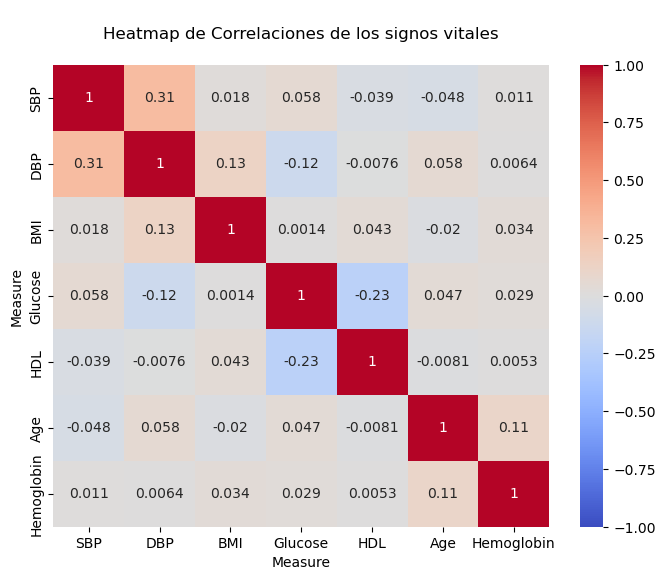

In [214]:
corr_matrix = diabeticWomen[['SBP', 'DBP', 'BMI', 'Glucose', 'HDL', 'Age', 'Hemoglobin']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("\nHeatmap de Correlaciones de los signos vitales\n")
plt.show()

Parece que las correlaciones se mantienen más o menos igual que en las sanas. Lo cual es buena señal, porque nuestros datos son consistentes con los datos yaanalizados y con los que hemos entrenado a los modelos. 

In [217]:
diabeticWomen.to_csv('gdmEncounterDiabeticPatients.csv', index=False)

In [5]:
diabeticWomen = pd.read_csv('gdmEncounterDiabeticPatients.csv')

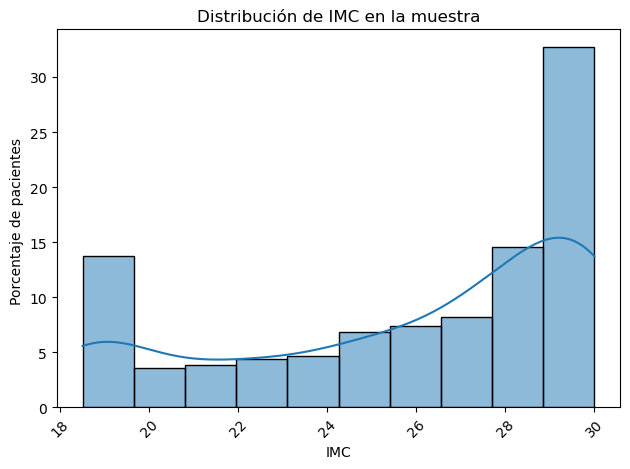

In [41]:
import seaborn as sns
sns.histplot(diabeticWomen['BMI'], kde= True, stat = "percent")
plt.title('Distribución de IMC en la muestra')
plt.xlabel('IMC')
plt.ylabel('Porcentaje de pacientes ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()